# 👌🏻 Crear Dataset

In [7]:
import numpy as np
import pandas as pd

In [8]:
numbers = np.arange(1, 101)

data = {
    "Num_1": np.repeat(numbers, len(numbers)),
    "Num_2": np.tile(numbers, len(numbers)),
    "addition": np.repeat(numbers, len(numbers)) + np.tile(numbers, len(numbers)),
    "subtraction": np.repeat(numbers, len(numbers)) - np.tile(numbers, len(numbers)),
    "multiplication": np.repeat(numbers, len(numbers)) * np.tile(numbers, len(numbers)),
    "division": np.round(np.repeat(numbers, len(numbers)) / np.tile(numbers, len(numbers)), 2)
}

In [9]:
df = pd.DataFrame(data)
df = pd.melt(df, id_vars = ["Num_1", "Num_2"],
             value_vars = ["addition", "subtraction", "multiplication", "division"],
             value_name = "Result",
             var_name = "Operation")

df.head()

,Num_1,Num_2,Operation,Result
0,1,1,addition,2.0
1,1,2,addition,3.0
2,1,3,addition,4.0
3,1,4,addition,5.0
4,1,5,addition,6.0


In [10]:
operation_labels = {
    "addition": 0,
    "subtraction": 1,
    "multiplication": 2,
    "division": 3
}

df["Operation_label"] = df["Operation"].map(operation_labels)
df.head()

,Num_1,Num_2,Operation,Result,Operation_label
0,1,1,addition,2.0,0
1,1,2,addition,3.0,0
2,1,3,addition,4.0,0
3,1,4,addition,5.0,0
4,1,5,addition,6.0,0


# 👀 ver informacion del dataset

In [11]:
df["Operation"].value_counts()

Operation
addition          10000
subtraction       10000
multiplication    10000
division          10000
Name: count, dtype: int64

In [12]:
df.describe()

,Num_1,Num_2,Result,Operation_label
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,50.500000,50.500000,663.467404,1.500000
std,28.866431,28.866431,1557.333307,1.118048
min,1.000000,1.000000,-99.000000,0.000000
25%,25.750000,25.750000,0.997500,0.750000
50%,50.500000,50.500000,49.000000,1.500000
75%,75.250000,75.250000,163.000000,2.250000
max,100.000000,100.000000,10000.000000,3.000000


In [13]:
df[df["Result"] == -99]

,Num_1,Num_2,Operation,Result,Operation_label
10099,1,100,subtraction,-99.0,1


# 🥶 Seperar las caracteristicas de la variable objetivo 🎯

In [14]:
X = df[["Num_1", "Num_2", "Result"]].values
Y = df["Operation_label"].values

print(X.shape, Y.shape)
print(X)
print(Y)

(40000, 3) (40000,)
[[  1.     1.     2.  ]
 [  1.     2.     3.  ]
 [  1.     3.     4.  ]
 ...
 [100.    98.     1.02]
 [100.    99.     1.01]
 [100.   100.     1.  ]]
[0 0 0 ... 3 3 3]


# ⛏️ Dividir el dataset en entrenamiento y validacion

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(32000, 3) (32000,)
(8000, 3) (8000,)


# 📝 Arquitectura del modelo

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential([
    Input(shape=(3,)),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(4, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404 (1.58 KB)

 Trainable params: 404 (1.58 KB)

 Non-trainable params: 0 (0.00 B)

# ✌🏻 Configurar el modelo

In [19]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train,
                    Y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test, Y_test))

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 355us/step - accuracy: 0.8971 - loss: 12.1493 - val_accuracy: 0.9808 - val_loss: 0.0977
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.9785 - loss: 0.0905 - val_accuracy: 0.9845 - val_loss: 0.0760
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9810 - loss: 0.0718 - val_accuracy: 0.9893 - val_loss: 0.0609
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.9832 - loss: 0.0607 - val_accuracy: 0.9836 - val_loss: 0.0539
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - accuracy: 0.9851 - loss: 0.0524 - val_accuracy: 0.9889 - val_loss: 0.0417
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9858 - loss: 0.0481 - val_accuracy: 0.9877 - val_loss: 0.0422
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9850 - loss: 0.0468 - val_accuracy: 0.9796 - val_loss: 0.0522
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy:

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Matplotlib is building the font cache; this may take a moment.


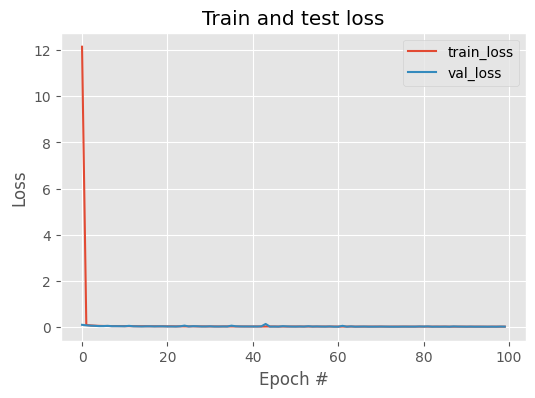

In [23]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(6, 4))
plt.plot(np.arange(0, len(history.history["loss"])), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, len(history.history["loss"])), history.history["val_loss"], label="val_loss")
plt.title("Train and test loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

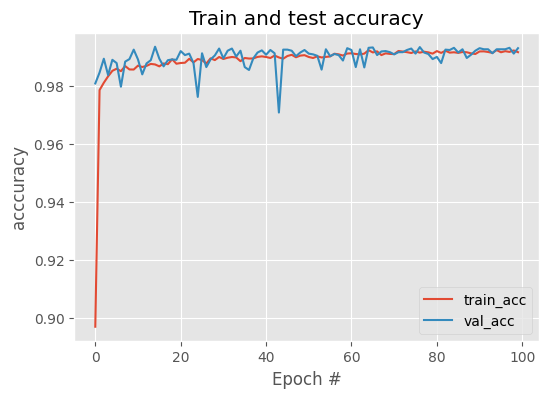

In [24]:
plt.style.use("ggplot")
plt.figure(figsize=(6, 4))
plt.plot(np.arange(0, len(history.history["accuracy"])), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, len(history.history["val_accuracy"])), history.history["val_accuracy"], label="val_acc")
plt.title("Train and test accuracy")
plt.xlabel("Epoch #")
plt.ylabel("acccuracy")
plt.legend()
plt.show()

In [25]:
model.evaluate(X_train, Y_train)

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - accuracy: 0.9930 - loss: 0.0174


[0.017391400411725044, 0.9929999709129333]

In [27]:
model.evaluate(X_test, Y_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - accuracy: 0.9929 - loss: 0.0186 


[0.01858191005885601, 0.9928749799728394]

# 🥳 predicciones

In [33]:
new_data = np.array([
    [99, 5, 19.8],
    [10, 10, 0],
    [2, 2, 4],
    [10000, 2, 9998],
    [-10, 2, -8]
])

predictions = model.predict(new_data)
predictions = np.round(predictions, 2)
print(predictions)

predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]
 [0.79 0.   0.18 0.03]
 [0.   0.   0.   1.  ]
 [0.   1.   0.   0.  ]]
[3 1 0 3 1]


In [35]:
operation_map = {
    0: "addition",
    1: "Subtraction",
    2: "multiplication",
    3: "division"
}

for i, (inputs, pred_class) in enumerate(zip(new_data, predicted_classes)):
    op = operation_map[pred_class]
    print(f"Para los numeros {inputs[:2]} con resultado {inputs[2]} -> {op}")

Para los numeros [99.  5.] con resultado 19.8 -> division
Para los numeros [10. 10.] con resultado 0.0 -> Subtraction
Para los numeros [2. 2.] con resultado 4.0 -> addition
Para los numeros [1.e+04 2.e+00] con resultado 9998.0 -> division
Para los numeros [-10.   2.] con resultado -8.0 -> Subtraction
